#### General
* Hypothesis: $\hat{y} ={f}(b + Xw)$

* Sigmoid Function: ${f}(z) = \frac{1}{1+e^-z}$

* Cost Function:
    * $C_i = -(1-y_i)log(1-\hat{y}_i)-y_ilog(\hat{y}_i)$
        * When $y_i = 0$: $C_i = -(1-y_i)log(1-\hat{y}_i)$
            * When value is negative, the cost is small and vice versa
        * When $y_i = 1$: $C_i = -(1-y_i)-y_ilog(\hat{y}_i)$
            * When value is positive, the cost is small and vice versa
    * Average Cross-Entropy / Binary Log Loss: 
         * $ c = \frac{1}{N}\Sigma  c_i$
         

Logistic regression provides a probability of an outcome. This requires us to select a threshold of probability which leads to the classification of a set of data. i.e. if p>.5 the label is 1 and so forth. Such classification can better allow us to determine the accuracy of the model based on in-sample and out-of-sample data.  

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras.models import Sequential # Adding elements in a sequence
from keras.layers import Dense
from keras.optimizers import Adam, SGD # Change our weights and biases
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('data/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


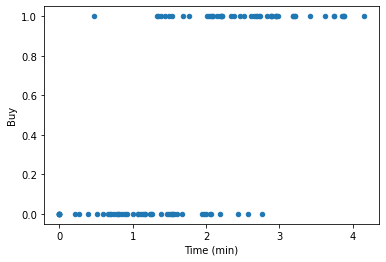

In [9]:
df.plot(kind='scatter',x='Time (min)',y = 'Buy')

In [15]:
model = Sequential()
model.add(Dense(1,input_shape=(1,),activation='sigmoid'))
model.compile(SGD(lr=.5),'binary_crossentropy',metrics=['accuracy'])

In [19]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X,y,epochs=25,verbose=0)

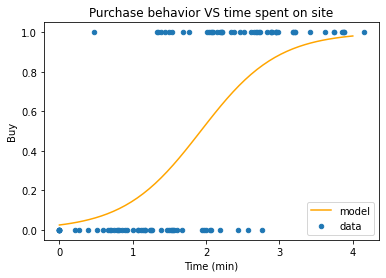

In [23]:
ax = df.plot(kind='scatter',x='Time (min)',y = 'Buy', title='Purchase behavior VS time spent on site')

temp = np.linspace(0,4)
ax.plot(temp,model.predict(temp),color='orange')
plt.legend(['model','data'])

In [30]:
temp_class = model.predict(temp) > 0.5

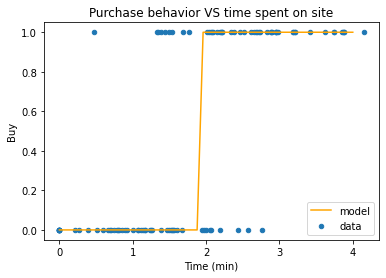

In [31]:
ax = df.plot(kind='scatter',x='Time (min)',y = 'Buy', title='Purchase behavior VS time spent on site')

temp = np.linspace(0,4)
ax.plot(temp,temp_class,color='orange')
plt.legend(['model','data'])

In [34]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [35]:
from sklearn.metrics import accuracy_score

In [37]:
print(f'Accuracy of Log Regression:\n{accuracy_score(y,y_class_pred)}')

Accuracy of Log Regression:
0.82


### Resetting Model and utilizing Train Test Split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [39]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params] # much more efficient
model.set_weights(params)

In [40]:
model.fit(X_train,y_train, epochs=25,verbose=0)


In [42]:
print(f'Model Test Accuracy:\n{accuracy_score(y_test,model.predict(X_test) > 0.5)}')

Model Test Accuracy:
0.9


### Cross Validation
* General Method:
    * Run our split in multiple proportions to allow for different scenarios of our data to be seen by the model. This then would allow us to take averages of the scores as well as standard deviations. 
* Stratified:
    * Good for classifcation scenarios, we split the data so that the classes are equal in both train and test sets. i.e. 40% true and 60% false in both groups. 
* LOLO and LPLO
    * Leave one label out
    * Leave P labels out
        * Leaves out a particular label which is used to split the data

In [43]:
from keras.wrappers.scikit_learn import KerasClassifier

In [49]:
def build_log_regression():
    model = Sequential()
    model.add(Dense(1,input_shape=(1,),activation='sigmoid'))
    model.compile(SGD(lr=.5),
                  'binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [50]:
model = KerasClassifier(build_fn=build_log_regression,epochs=25,verbose=0)

### Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score, KFold

In [52]:
cv = KFold(3,shuffle=True)
scores = cross_val_score(model,X,y,cv=cv)

In [53]:
scores # 3 Folds 

array([0.82352942, 0.81818181, 0.75757575])

In [55]:
print(scores.mean())
print(scores.std())

0.7997623284657797
0.02991019627343735


### Confusion Matrix
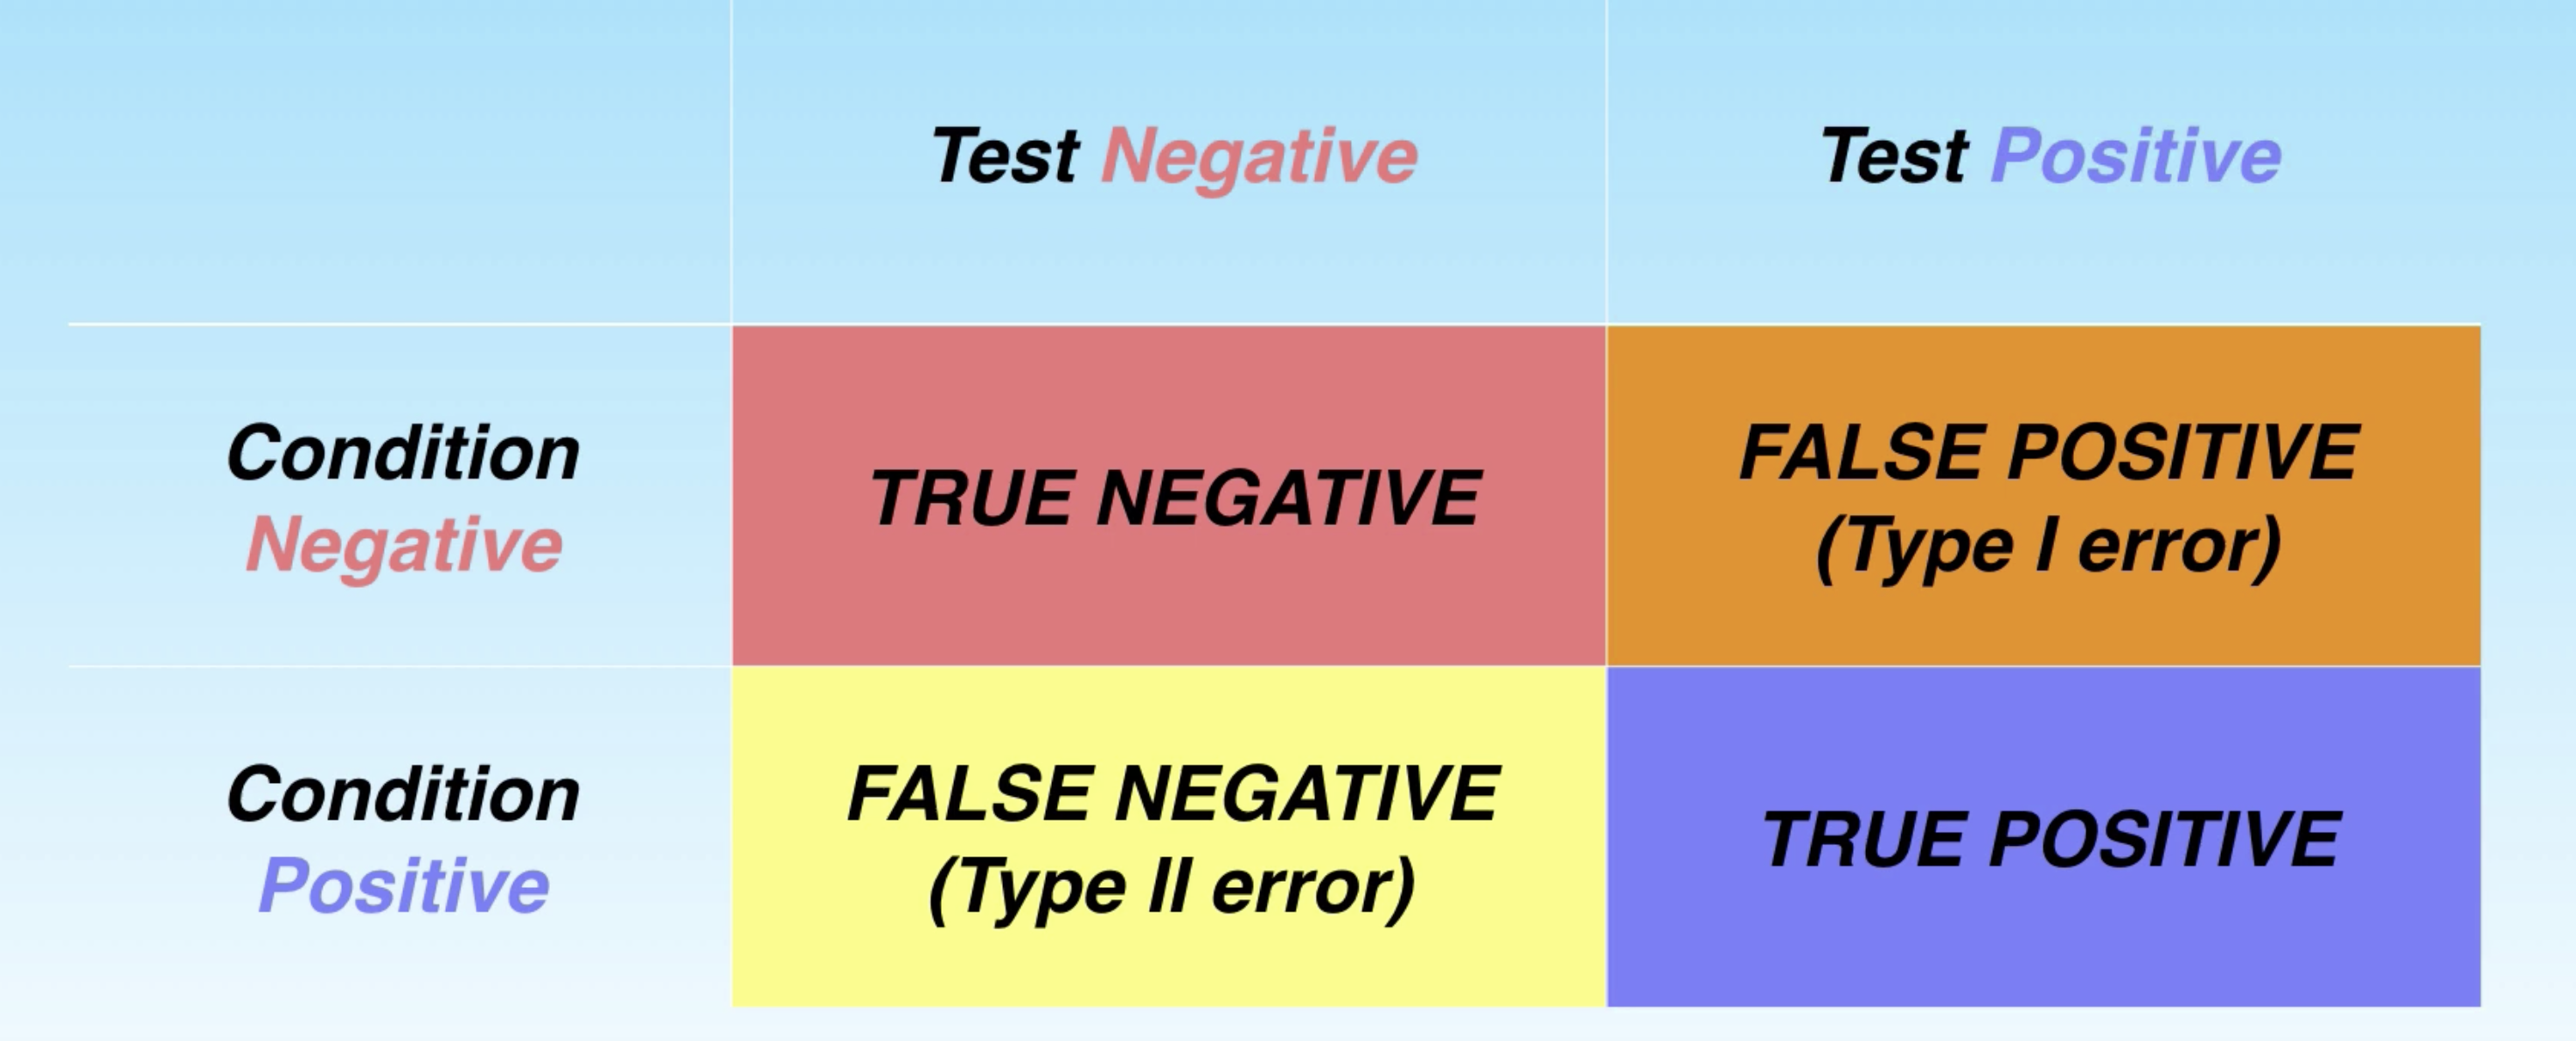

* Accuracy: (TP + TN)/ total
* Precision (P): Test Positive, how often the prediction is correct proportionally.
    * TP / test yes
* Recall (R): Actual Value Prediction
    * TP / Actual Yes
* F1 = 2 (P*R) / P+R
    * High if both precision and Recall are high, which is our goal. 

### Multi-Class Confusion Matrix
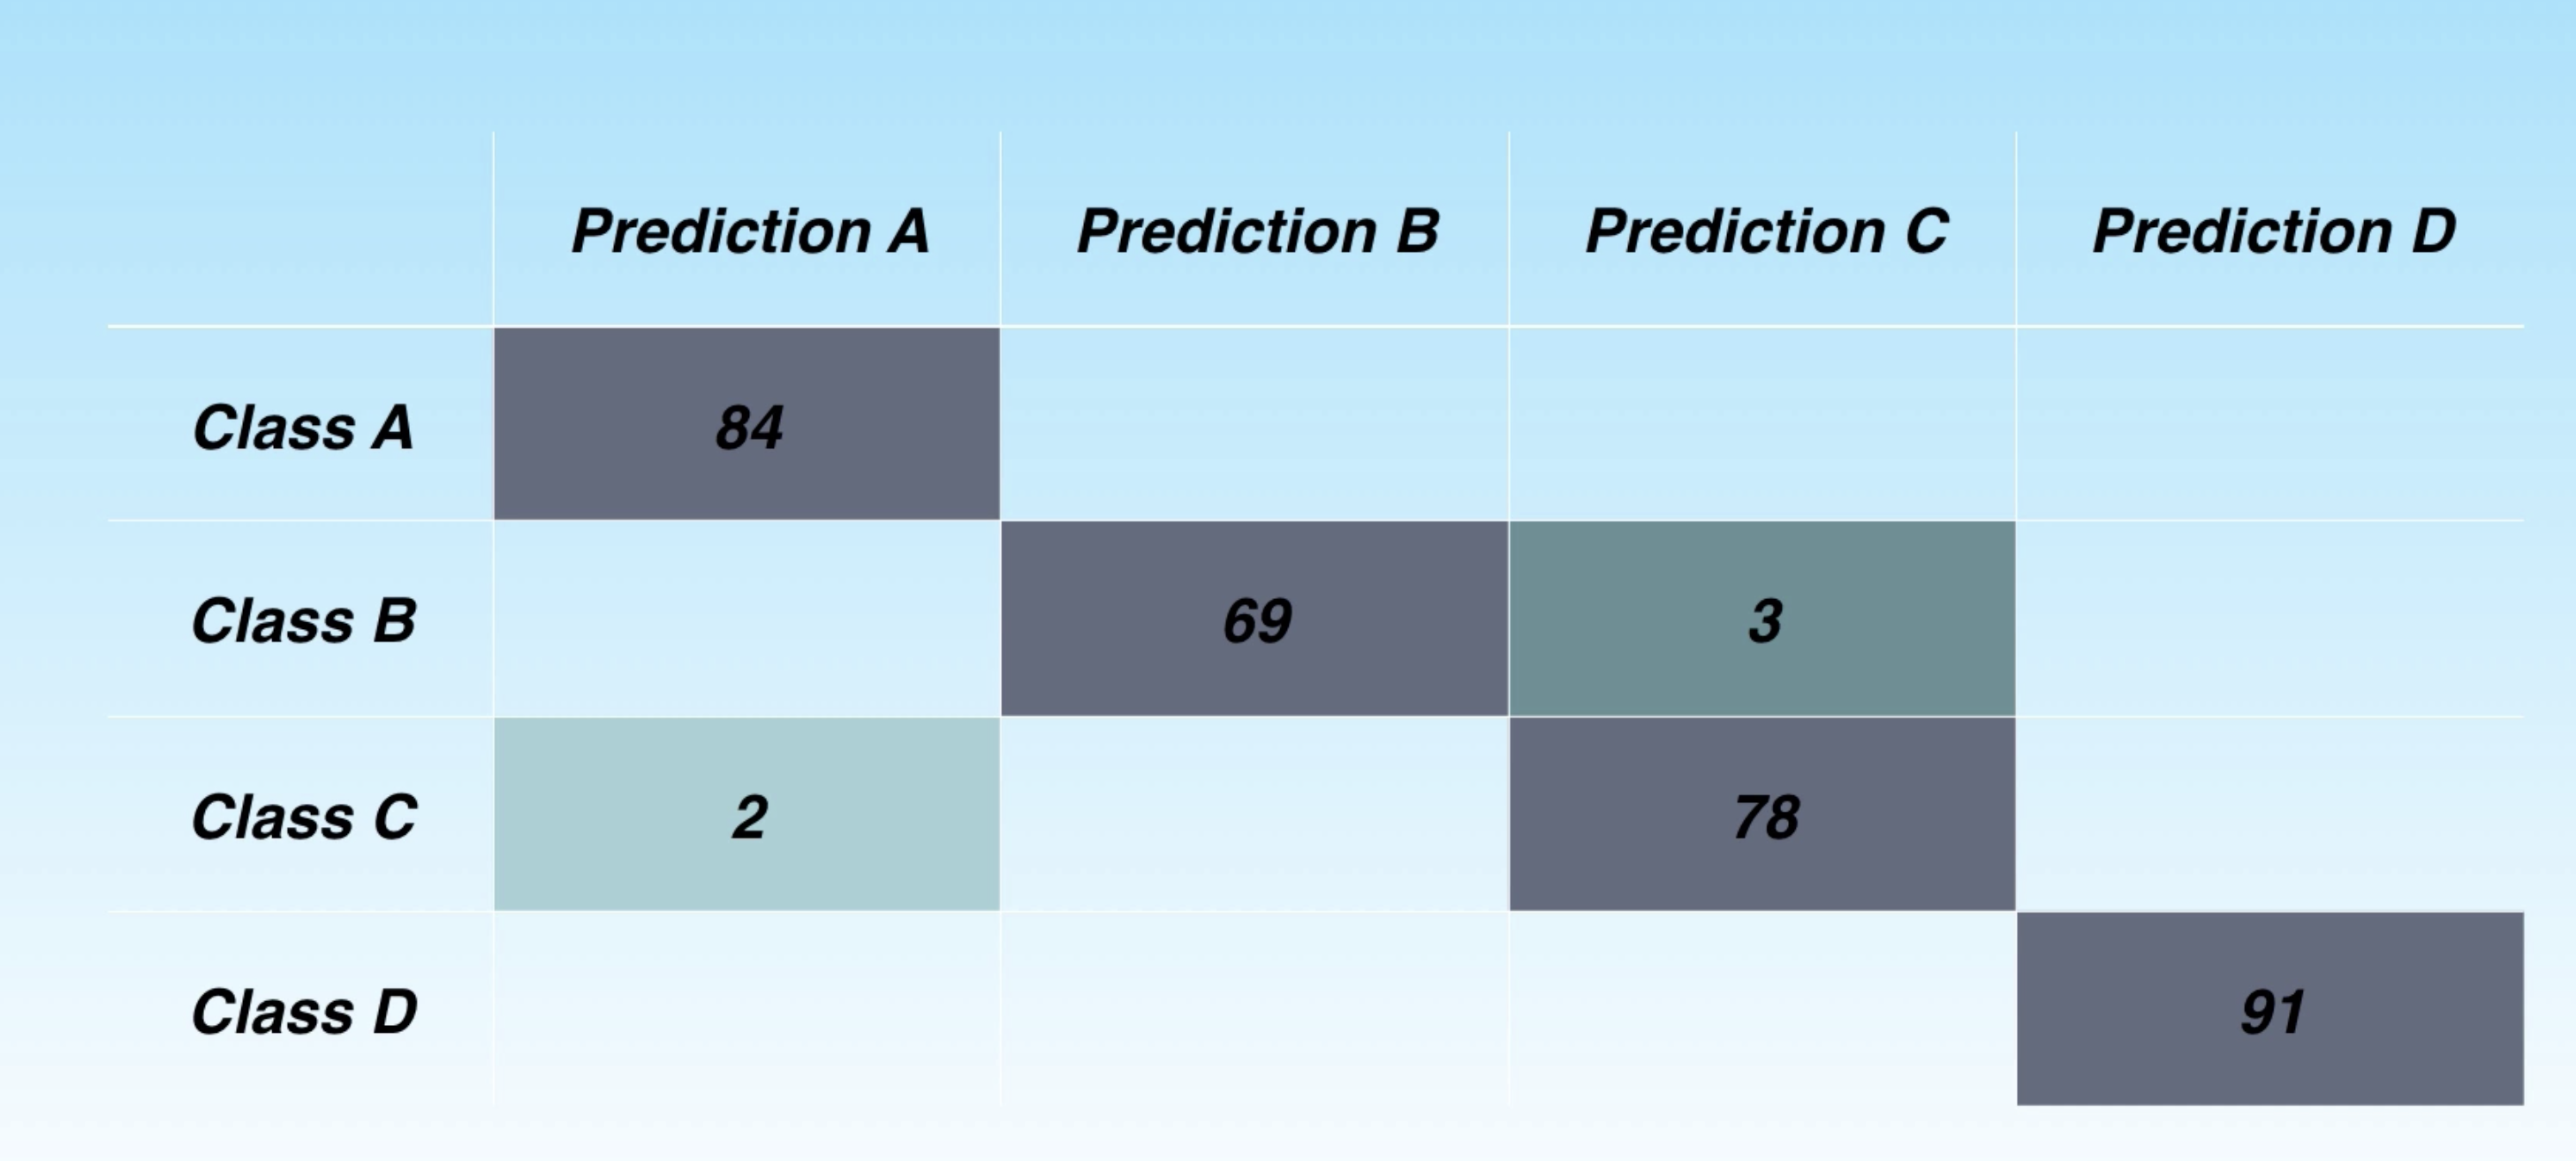

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [60]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 9, 41]])

In [65]:
def pretty_confusion_matrix(y_true,y_pred,labels =['False','True']):
    cm = confusion_matrix(y_true,y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm,index=labels,columns=pred_labels)
    return df

In [66]:
pretty_confusion_matrix(y,y_class_pred,['Not Buy','Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,9,41


In [68]:
print(f'Precision: {precision_score(y,y_class_pred)}')
print(f'Recall: {recall_score(y,y_class_pred)}')
print(f'F1 Score: {f1_score(y,y_class_pred)}')

Precision: 0.82
Recall: 0.82
F1 Score: 0.82


In [71]:
print(classification_report(y,y_class_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.82      0.82      0.82        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

